<a href="https://colab.research.google.com/github/VgQ8Auk/DeOldify/blob/main/DeOldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify
%cd DeOldify

fatal: destination path 'DeOldify' already exists and is not an empty directory.
/content/DeOldify


In [ ]:
!pip install -r requirements-colab.txt

In [ ]:
!mkdir './models/'
CMD = "wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth"\
  " -O ./models/ColorizeArtistic_gen.pth"
!{CMD}

mkdir: cannot create directory ‘./models/’: File exists
--2024-06-11 15:49:07--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.199.37.232
Connecting to data.deepai.org (data.deepai.org)|138.199.37.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  5.05MB/s    in 50s     

2024-06-11 15:49:56 (4.91 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
import sys

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.CPU)

import torch
if not torch.cuda.is_available():
  print('GPU not available.')
else:
  print('Using GPU.')

GPU not available.


In [ ]:
# HIDE OUTPUT
import fastai
from deoldify.visualize import *
import warnings
from urllib.parse import urlparse
import os

warnings.filterwarnings("ignore", category=UserWarning,
          message=".*?Your .*? set is empty.*?")
# https://upload.wikimedia.org/wikipedia/commons/7/7d/1936_genrich_grigorijewitsch_jagoda.jpg
# https://upload.wikimedia.org/wikipedia/commons/8/87/Levytsky_Kost-1-.jpg
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/87/Levytsky_Kost-1-.jpg'

!wget {URL}

a = urlparse(URL)
before_file = os.path.basename(a.path)

RENDER_FACTOR = 10
WATERMARK = False

colorizer = get_image_colorizer(artistic=True)

after_image = colorizer.get_transformed_image(
    before_file, render_factor=RENDER_FACTOR,
    watermarked=WATERMARK)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
--2024-06-11 15:50:04--  https://upload.wikimedia.org/wikipedia/commons/8/87/Levytsky_Kost-1-.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73249 (72K) [image/jpeg]
Saving to: ‘Levytsky_Kost-1-.jpg.1’

Levytsky_Kost-1-.jp 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2024-06-11 15:50:04 (6.82 MB/s) - ‘Levytsky_Kost-1-.jpg.1’ saved [73249/73249]



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

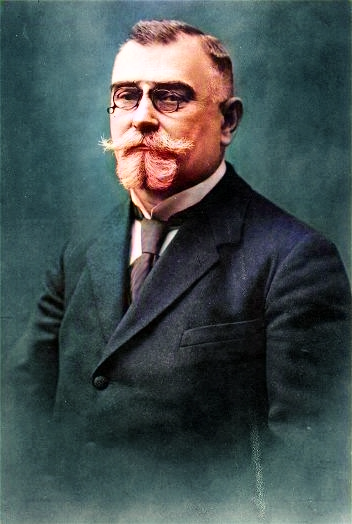

In [ ]:
#from IPython import display
#display.Image(URL)
after_image

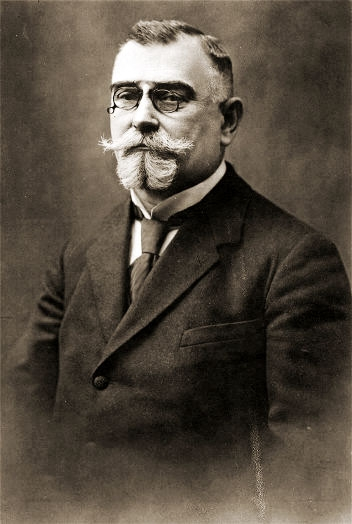

In [ ]:
from IPython import display
display.Image(URL)